In [1]:
import pandas as pd

data = pd.read_csv("TF2_selected.csv")
data.head()

,Unnamed: 0,Y,Stop_Duration,X,Jerk,Direction_Change,Movement_Distance,Acceleration,Button,Angle,ID
0,0,500,-0.0,579,-319.936258,1,2.236068,-164.440265,-1,-0.463648,001-tf2-315
1,1,499,-0.0,580,163.618411,1,1.414214,-0.821854,-1,-0.785398,001-tf2-315
2,2,499,-0.0,581,0.407641,1,1.000000,-0.414214,-1,0.000000,001-tf2-315
3,3,499,-0.0,583,1.414214,0,2.000000,1.000000,-1,0.000000,001-tf2-315
4,4,499,-0.0,584,-2.000000,0,1.000000,-1.000000,-1,0.000000,001-tf2-315


In [2]:
# List of columns to select
selected_columns = ['Y', 'Stop_Duration', 'X', 'Jerk', 'Direction_Change', 'Movement_Distance', 'Acceleration', 'Button', 'Angle', 'ID']

# Select the desired columns
df_selected = data[selected_columns]
df_selected.head()

,Y,Stop_Duration,X,Jerk,Direction_Change,Movement_Distance,Acceleration,Button,Angle,ID
0,500,-0.0,579,-319.936258,1,2.236068,-164.440265,-1,-0.463648,001-tf2-315
1,499,-0.0,580,163.618411,1,1.414214,-0.821854,-1,-0.785398,001-tf2-315
2,499,-0.0,581,0.407641,1,1.000000,-0.414214,-1,0.000000,001-tf2-315
3,499,-0.0,583,1.414214,0,2.000000,1.000000,-1,0.000000,001-tf2-315
4,499,-0.0,584,-2.000000,0,1.000000,-1.000000,-1,0.000000,001-tf2-315


In [3]:
df_selected.dropna()

,Y,Stop_Duration,X,Jerk,Direction_Change,Movement_Distance,Acceleration,Button,Angle,ID
0,500,-0.0,579,-319.936258,1,2.236068,-164.440265,-1,-0.463648,001-tf2-315
1,499,-0.0,580,163.618411,1,1.414214,-0.821854,-1,-0.785398,001-tf2-315
2,499,-0.0,581,0.407641,1,1.000000,-0.414214,-1,0.000000,001-tf2-315
3,499,-0.0,583,1.414214,0,2.000000,1.000000,-1,0.000000,001-tf2-315
4,499,-0.0,584,-2.000000,0,1.000000,-1.000000,-1,0.000000,001-tf2-315
...,...,...,...,...,...,...,...,...,...,...
653552,539,-0.0,961,0.000000,1,1.414214,0.000000,-1,-0.785398,021-tf2-403
653553,539,-0.0,960,-0.414214,1,1.000000,-0.414214,-1,3.141593,021-tf2-403
653554,540,-0.0,961,0.828427,1,1.414214,0.414214,-1,0.785398,021-tf2-403
653555,540,-1.0,961,-1.828427,1,0.000000,-1.414214,-1,0.000000,021-tf2-403


# Label Encoder

In [4]:
from sklearn.preprocessing import LabelEncoder

df = df_selected

# Use LabelEncoder to convert User_ID into numerical labels
encoder = LabelEncoder()
df['User_ID'] = encoder.fit_transform(df['ID'])

# Print the mapping for reference
mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Label mapping:", mapping)

Label mapping: {'001-tf2-315': 0, '002-tf2-315': 1, '004-tf2-315': 2, '007-tf2-317': 3, '008-tf2-317': 4, '009-tf2-320': 5, '010-tf2-320': 6, '013-tf2-326': 7, '014-tf2-328': 8, '015-tf2-328': 9, '016-tf2-328': 10, '017-tf2-328': 11, '018-tf2-330': 12, '019-tf2-403': 13, '020-tf2-403': 14, '021-tf2-403': 15}


In [5]:
df.drop(columns='ID', inplace=True)

In [6]:
df.head()

,Y,Stop_Duration,X,Jerk,Direction_Change,Movement_Distance,Acceleration,Button,Angle,User_ID
0,500,-0.0,579,-319.936258,1,2.236068,-164.440265,-1,-0.463648,0
1,499,-0.0,580,163.618411,1,1.414214,-0.821854,-1,-0.785398,0
2,499,-0.0,581,0.407641,1,1.000000,-0.414214,-1,0.000000,0
3,499,-0.0,583,1.414214,0,2.000000,1.000000,-1,0.000000,0
4,499,-0.0,584,-2.000000,0,1.000000,-1.000000,-1,0.000000,0


# Relabel

In [7]:
# Relabel the User_ID column
df['User_ID'] = df['User_ID'].apply(lambda x: 0 if x == 14 else 1)

# Check the distribution of the relabeled User_ID
user_distribution = df['User_ID'].value_counts()

user_distribution

1    609554
0     44003
Name: User_ID, dtype: int64

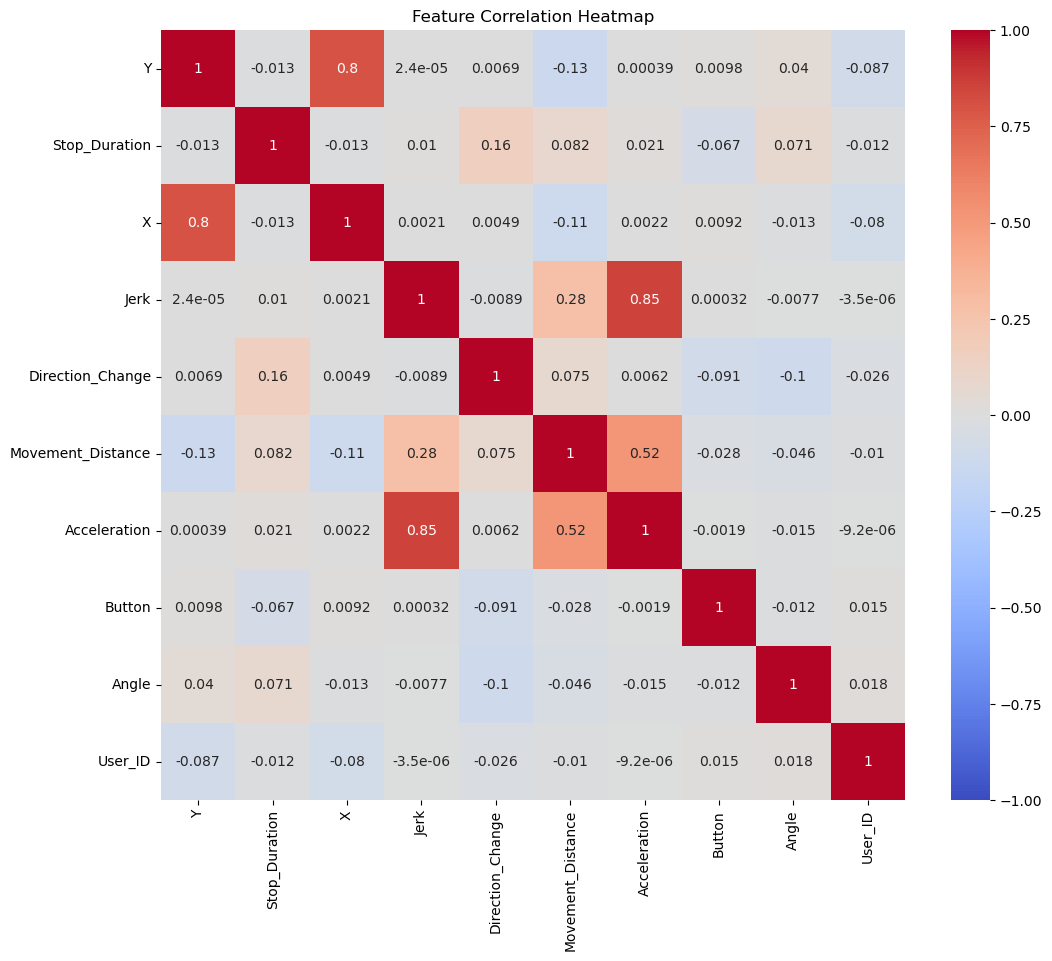

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

# normalie

In [9]:
df.columns

Index(['Y', 'Stop_Duration', 'X', 'Jerk', 'Direction_Change',
       'Movement_Distance', 'Acceleration', 'Button', 'Angle', 'User_ID'],
      dtype='object')

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the features
features = ['Y', 'Stop_Duration', 'X', 'Jerk', 'Direction_Change', 'Movement_Distance', 'Acceleration', 'Button', 'Angle']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])


# Sequencing

In [11]:
import numpy as np

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i+seq_length), :-1]
        y = data[i+seq_length][-1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(df.values, 40)

# Normal Data Split

In [12]:
from sklearn.model_selection import train_test_split

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross validation

In [13]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Model

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.regularizers import l2


#Meetric
precission = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
AUC_ROC = tf.keras.metrics.AUC(curve='ROC')

# 3. Build the GRU model
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(50))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[precission, recall, AUC_ROC])


# TRAIn singe time

In [16]:
# 4. Train the model
model.fit(X_train, y_train, epochs=12, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/12
8169/8169 [==============================] - 375s 45ms/step - loss: 0.2246 - precision: 0.9327 - recall: 0.9999 - auc: 0.7244 - val_loss: 0.2030 - val_precision: 0.9326 - val_recall: 0.9999 - val_auc: 0.8151
Epoch 2/12
8169/8169 [==============================] - 417s 51ms/step - loss: 0.1931 - precision: 0.9353 - recall: 0.9977 - auc: 0.8397 - val_loss: 0.1759 - val_precision: 0.9426 - val_recall: 0.9917 - val_auc: 0.8784
Epoch 3/12
8169/8169 [==============================] - 432s 53ms/step - loss: 0.1629 - precision: 0.9466 - recall: 0.9916 - auc: 0.8979 - val_loss: 0.1413 - val_precision: 0.9506 - val_recall: 0.9949 - val_auc: 0.9285
Epoch 4/12
8169/8169 [==============================] - 459s 56ms/step - loss: 0.1322 - precision: 0.9593 - recall: 0.9892 - auc: 0.9361 - val_loss: 0.1057 - val_precision: 0.9724 - val_recall: 0.9879 - val_auc: 0.9601
Epoch 5/12
8169/8169 [==============================] - 471s 58ms/step - loss: 0.1090 - precision: 0.9681 - recall: 0.9892 -

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 40, 50)            9150      
                                                                 
 dropout (Dropout)           (None, 40, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 40, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 40, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 50)                15300     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 39801 (155.47 KB)
Trainable params: 39801 

In [19]:
# save model
model.save("GRU_TF2_USER20.h5")

C:\Users\drago\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Eval

## Train

In [20]:
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_probs = model.predict(X_train)


# Convert probabilities to binary outputs
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

# Calculate F1 score
f1 = f1_score(y_train, y_pred)
print(f"F1 Score: {f1}")

16338/16338 [==============================] - 172s 10ms/step
F1 Score: 0.9952962790573694


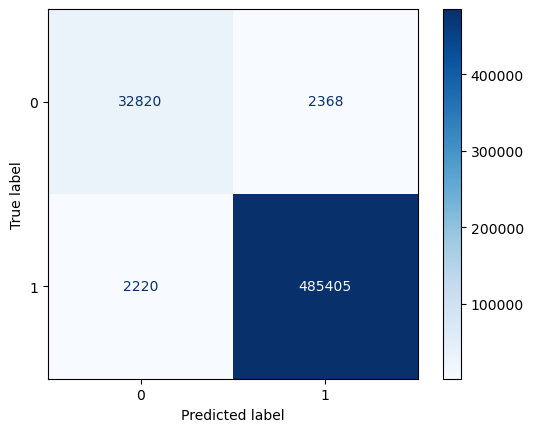

In [21]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate and plot confusion matrix
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# [[TN, FP],
# [FN, TP]]

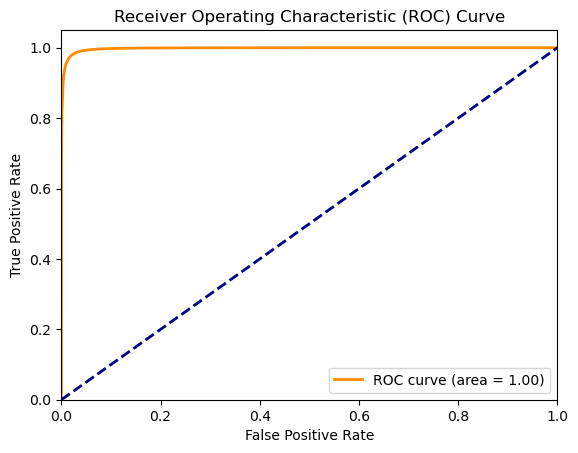

In [22]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_train, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Test

In [23]:
loss, precision, recall, AUC = model.evaluate(X_test, y_test)

4085/4085 [==============================] - 51s 12ms/step - loss: 0.0345 - precision: 0.9932 - recall: 0.9946 - auc: 0.9960


In [24]:
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test)


# Convert probabilities to binary outputs
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

4085/4085 [==============================] - 52s 13ms/step
F1 Score: 0.9939003894240623


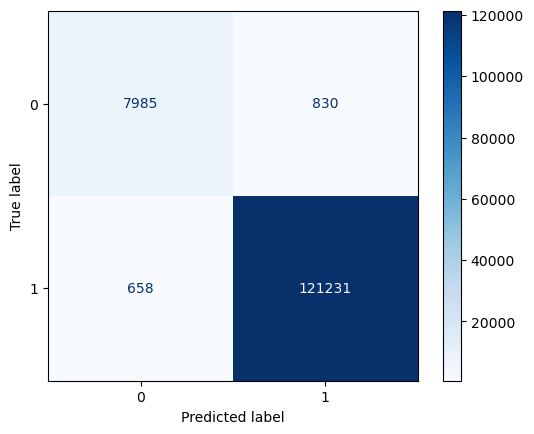

In [25]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# [[TN, FP],
# [FN, TP]]

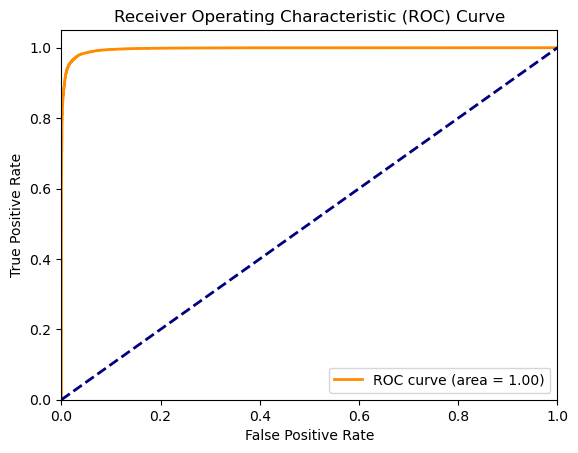

In [26]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()